### Sales Prediction for Big Mart Outlets

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. **The aim is to build a predictive model and predict the sales of each product at a particular outlet.**

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[15, 8]

<IPython.core.display.Javascript object>

In [4]:
train =pd.read_csv("~/Downloads/train_v9rqX0R (1).csv")

In [5]:
test =pd.read_csv("~/Downloads/test_AbJTz2l (1).csv")

In [6]:
# Check the Shape and Size of the Data
train.shape, test.shape

((8523, 12), (5681, 11))

In [7]:
# Check the Info of the Data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
train.head()

# 0s in Item Visibility

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Base Model

In [11]:
# Regression Problem - Average and Classification - 0

solution = pd.DataFrame({"Item_Identifier": test.Item_Identifier, 
                        "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales": train.Item_Outlet_Sales.mean()})

In [14]:
# Export the csv outside
solution.to_csv("Basemodel.csv", index = False) # 1773.8251377790564.

In [13]:
cd

C:\Users\mukul


### EDA - Univariate Analysis

In [9]:
# Num Vars...
combined = pd.concat([train, test], ignore_index = True)

In [10]:
combined.shape

(14204, 12)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

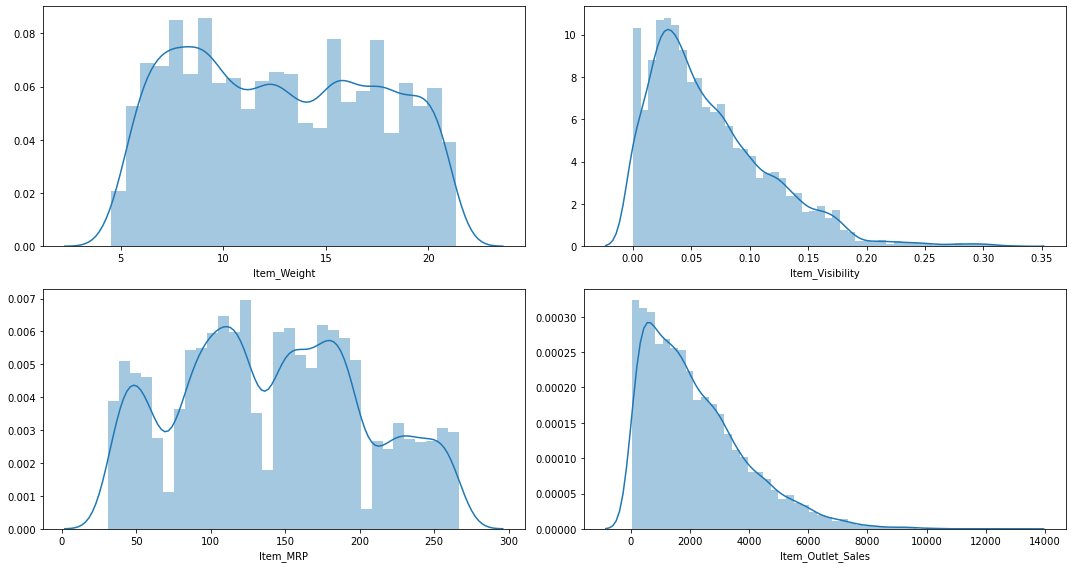

In [15]:
combined.select_dtypes(exclude='object').columns

cols=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

a=2
b=2
c=1
#plt.figure(figsize=[15,10])
for i in cols:
  plt.subplot(a,b,c)
  sns.distplot(combined.loc[:,i])
  plt.xlabel(i)
  c=c+1
plt.tight_layout()
plt.show()


### Inferences:

1. Item Outlet Sales is +vely skewed in nature. Of course, it is possible because there will be some people/customers who will be buying lot of items and hence the shape will be skewed.

2. Item MRP is multimodal in nature and the same is verified by looking in the data.

3. Item Visibilty is also skewed however, it starts from 0 because there are lots of entries which have 0s.. It means that the product has 0 visiblity i.e. that product does not exist however, the sales is intact. This is an anomaly. 

4. Item Weight is uniform in nature

In [16]:
combined.select_dtypes(include='object').columns


Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [19]:
# Lets fix the Item Fat Content
combined.Item_Fat_Content.replace(to_replace = ["low fat", "LF", "reg"], 
                                 value = ["Low Fat", "Low Fat", "Regular"], inplace = True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

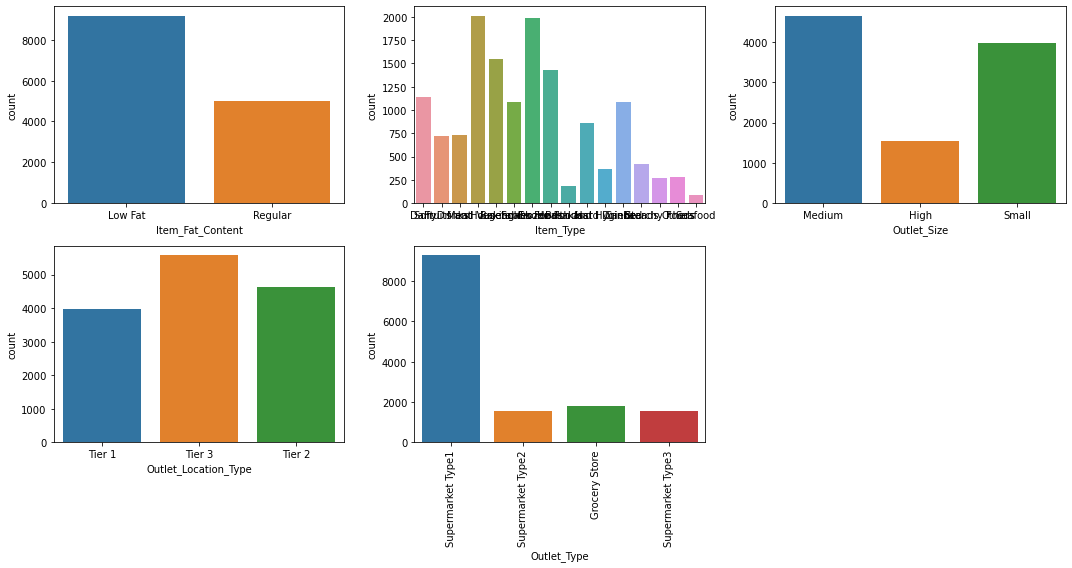

In [20]:
# Cat Variables
cols=['Item_Fat_Content', 'Item_Type', 
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

a=2
b=3
c=1
#plt.figure(figsize=[15,10])
for i in cols:
  plt.subplot(a,b,c)
  sns.countplot(combined.loc[:,i])
  plt.xlabel(i)
  c=c+1
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

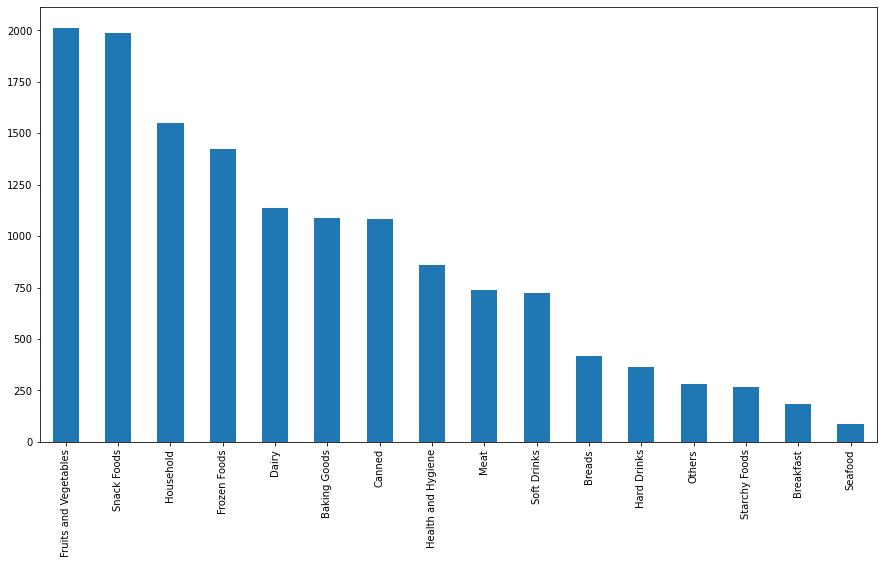

In [21]:
# Top 5 Selling Items - Frozen Food, Dairy, Fruits & Veggies, Household, Snacks

combined.Item_Type.value_counts().plot(kind = "bar")

In [26]:
# Outlet ID

combined.Outlet_Identifier.value_counts()

# Outlet 27 is the highest performing outlet... 

OUT027    1559
OUT013    1553
OUT049    1550
OUT035    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

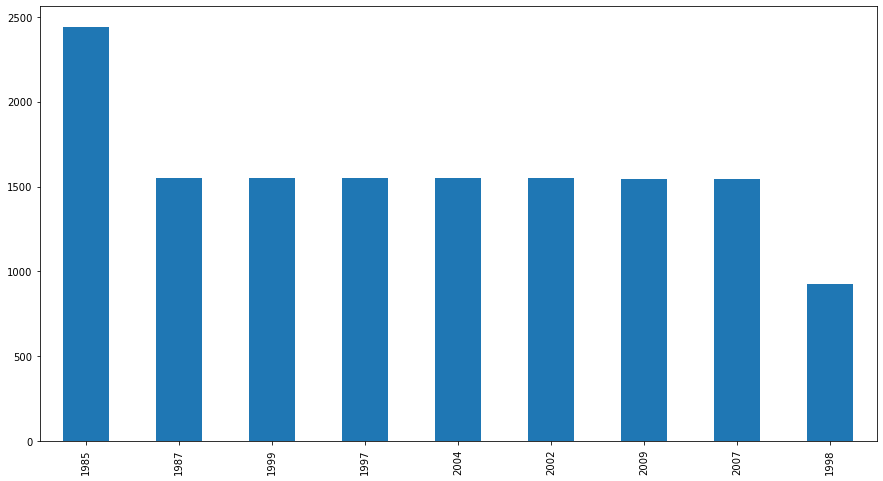

In [22]:
# Outlet Est Year
combined.Outlet_Establishment_Year.value_counts().plot(kind = "bar")

# Most of the Outlets were created in 1985

### Inferences:

* Most of the Items are either **Low Fat** or **Regular** in nature.
* Top 5 selling Items are **Fruits n Veggies, Household, Dairy, Snacks followed by Frozen Foods.**
* Most Visible Outlet is **OUT027**
* **S1** is the most popular Supermarket Type.
* Most of the outlets are based out of **Tier3** Cities followed by Tier2 and Tier1
* Most of the Outlets are **Medium Size Outlets**


* Suggestion: Establishment Year if 2013 would not be given to us, then we would have ended with lot of categories. Then you could have tried **Frequency Encoding**

In [25]:
# Frequency Encoded Establishment Year...
combined.Outlet_Establishment_Year.value_counts()/14204

1985    0.171712
1987    0.109335
1999    0.109124
1997    0.109124
2004    0.109124
2002    0.108983
2009    0.108843
2007    0.108631
1998    0.065123
Name: Outlet_Establishment_Year, dtype: float64

In [28]:
# Descriptive Statistics of the Numerical Variables...

cols=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

combined.loc[:, cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,2181.288914
std,4.652502,0.051459,62.086938,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.710000,0.027036,94.012000,834.247400
50%,12.600000,0.054021,142.247000,1794.331000
75%,16.750000,0.094037,185.855600,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


### Bivariate Analysis

* Num vs Num
* Cat Vs Num
* Cat Vs Cat ~ Predictor Variables...

<IPython.core.display.Javascript object>

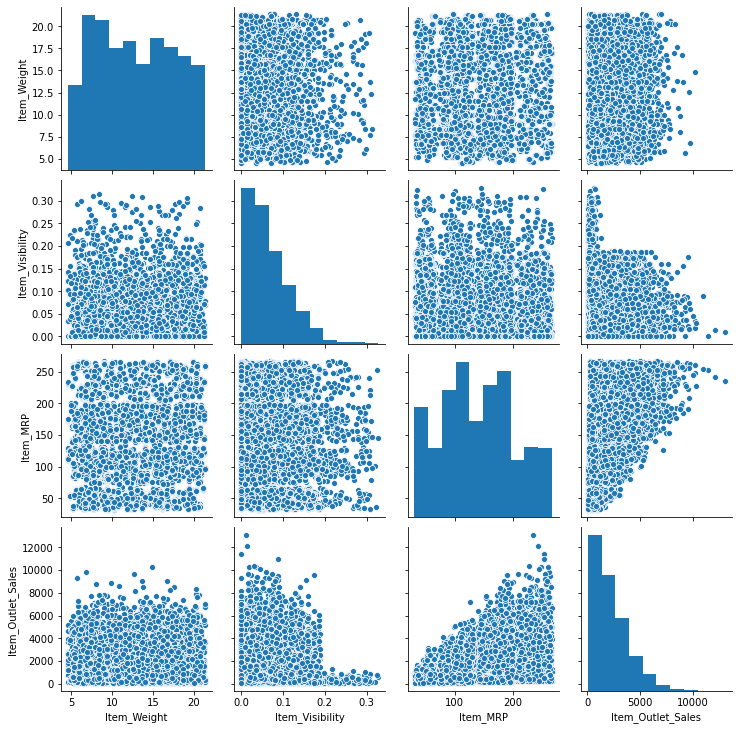

In [32]:
# Num vs Num

sns.pairplot(combined.loc[:, cols])

<IPython.core.display.Javascript object>

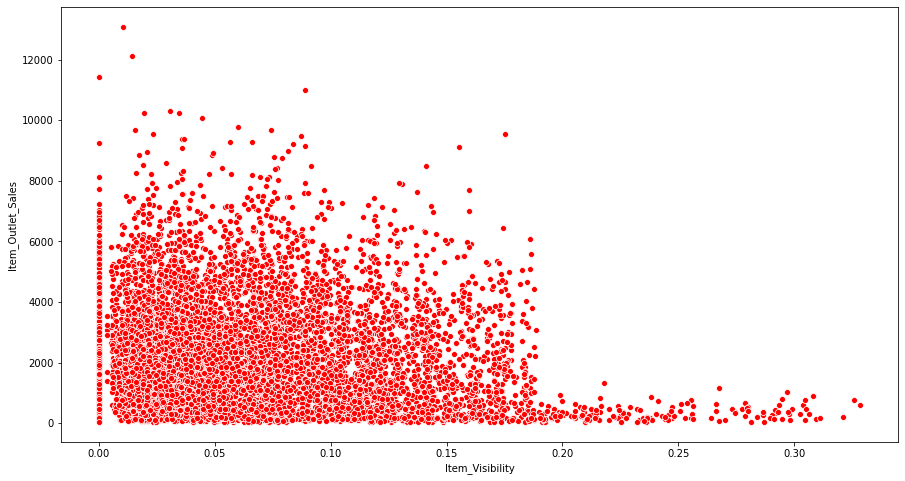

In [33]:
# Visibility vs Sales

sns.scatterplot(combined.Item_Visibility, combined.Item_Outlet_Sales, color = "red")
# Lot of Sales is captured where the visibility is 0.

<IPython.core.display.Javascript object>

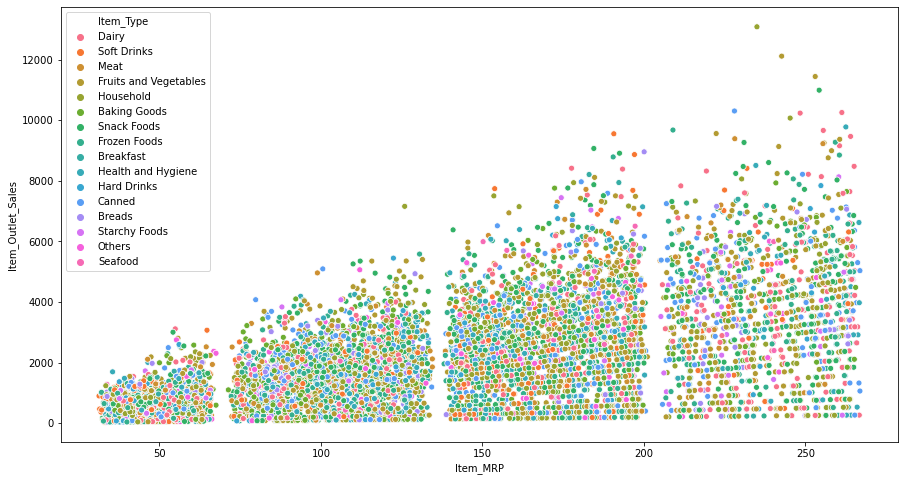

In [36]:
# Visibility vs Sales

sns.scatterplot(combined.Item_MRP, combined.Item_Outlet_Sales, color = "red", 
               hue = combined.Item_Type)

# 04 different clusters emerging in the data. 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

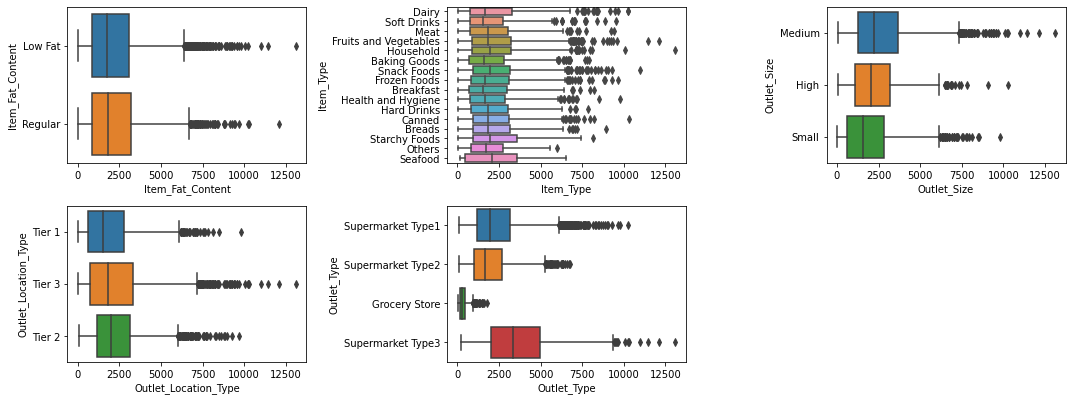

In [37]:
# Cat vs Num....
cols=['Item_Fat_Content', 'Item_Type', 
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

a = 3
b = 3
c = 1

for i in cols:
    plt.subplot(a,b,c)
    sns.boxplot(y = combined.loc[:, i], x = combined.Item_Outlet_Sales)
    plt.xlabel(i)
    c = c+1
    
plt.tight_layout()
plt.show()

### Inferences


<IPython.core.display.Javascript object>

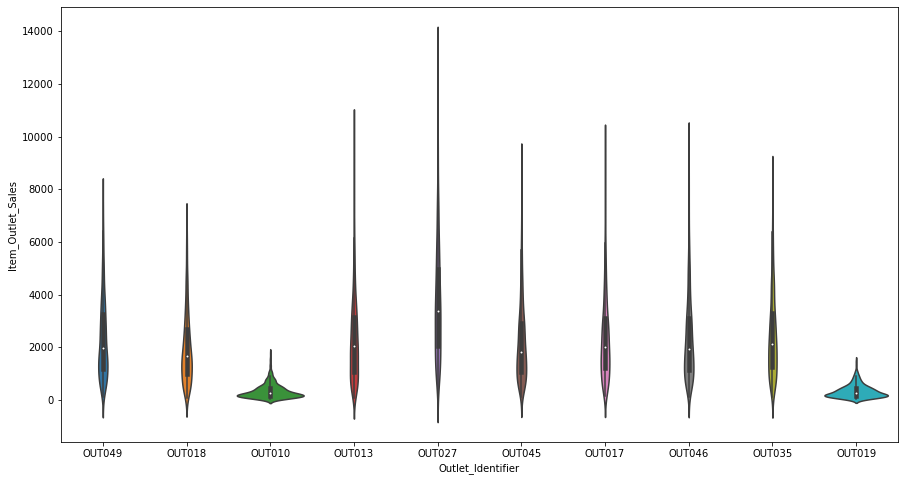

In [39]:
# plot the Outlet ID

sns.violinplot(x = "Outlet_Identifier", y = "Item_Outlet_Sales", data = combined)

<IPython.core.display.Javascript object>

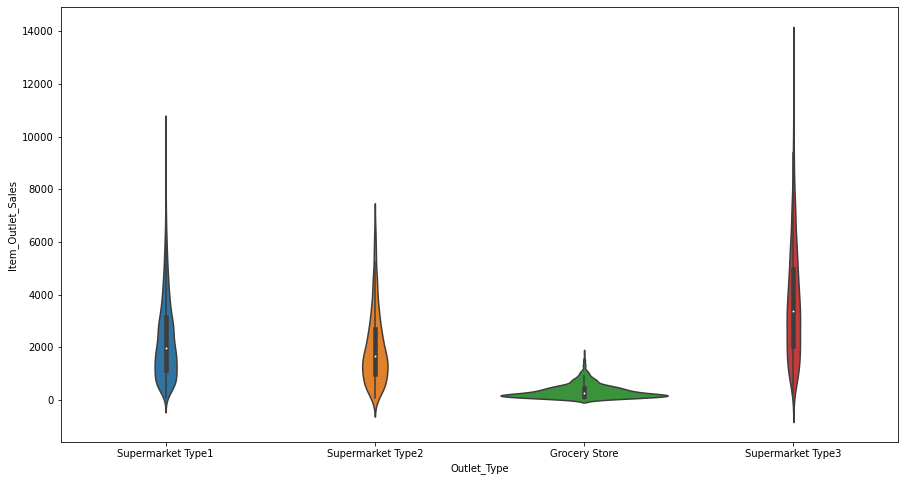

In [40]:
sns.violinplot(x = "Outlet_Type", y = "Item_Outlet_Sales", data = combined)

### Missing Values

In [45]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

In [47]:
combined.loc[combined.Item_Weight.isnull(), ].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [49]:
copy = combined.dropna()

In [50]:
import scipy.stats as stats

In [51]:
stats.ttest_ind(copy.Item_Weight, copy.Item_MRP)

Ttest_indResult(statistic=-140.33365155871437, pvalue=0.0)

In [52]:
copy.loc[:, ["Item_Weight", "Item_MRP"]].corr()

,Item_Weight,Item_MRP
Item_Weight,1.00000,0.03333
Item_MRP,0.03333,1.00000


<IPython.core.display.Javascript object>

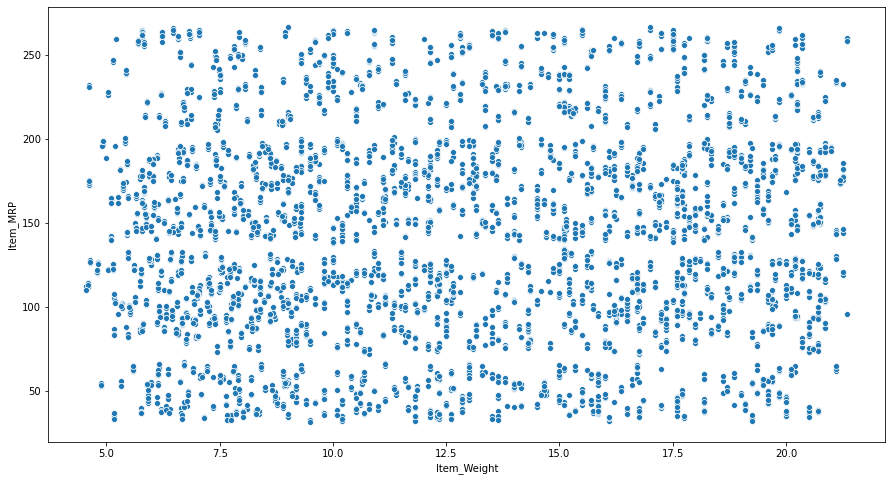

In [53]:
sns.scatterplot(copy.Item_Weight, copy.Item_MRP)

In [54]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [55]:
combined.loc[combined.Item_Weight.isnull(), ].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [59]:
combined.loc[combined.Item_Identifier=="DRI11", "Item_Weight"]

18        NaN
1366      NaN
3127     8.26
5310     8.26
7022     8.26
7192     8.26
8483     8.26
10246    8.26
10674    8.26
12022    8.26
Name: Item_Weight, dtype: float64

In [65]:
# Dictionary Based Approach
dict_wt = np.round(combined.groupby("Item_Identifier")["Item_Weight"].mean(), 2).to_dict()

In [67]:
combined["Item_Weight"] = combined.Item_Identifier.map(dict_wt)

In [71]:
# Item Visibility ==00

combined["Item_Visibility"] = combined.groupby("Item_Identifier")
["Item_Visibility"].apply(lambda x:x.replace(to_replace = 0,value = x.median()))

In [77]:
combined.loc[combined.Item_Visibility==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [75]:
# Replacing Item Visibility 0s with Fruits & Veggies Visibility

combined.loc[combined.Item_Type=="Fruits and Vegetables", "Item_Visibility"].median()

0.058279823

In [76]:
combined.Item_Visibility.replace(to_replace = 0, value = 0.058279823, inplace = True)

In [79]:
# Check the Missing Values again...
combined.isnull().sum()[combined.isnull().sum()!=0]

Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

In [91]:
combined.loc[combined.Outlet_Size.isnull(), ].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.00,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
33,FDO23,17.85,Low Fat,0.146427,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
46,NCP05,19.60,Low Fat,0.025282,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384


<IPython.core.display.Javascript object>

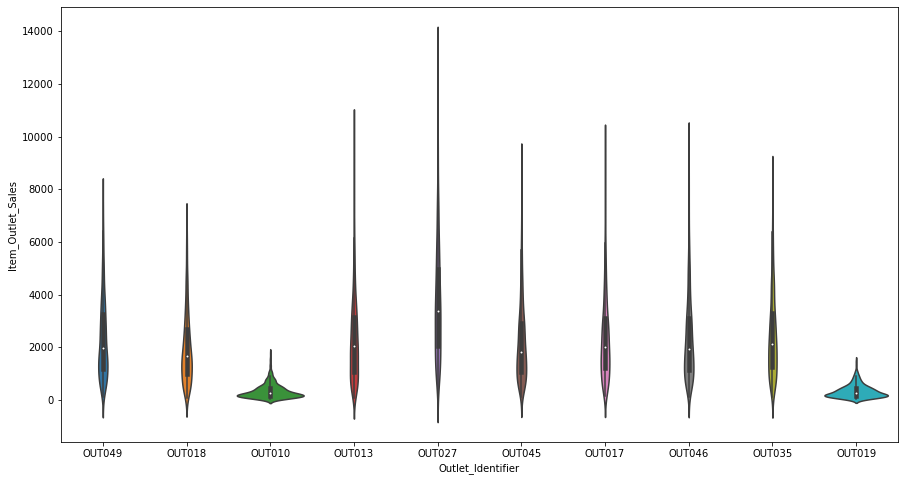

In [82]:
# Check the Volin Plot of Outlet ID and Sales

sns.violinplot(x = "Outlet_Identifier", y = "Item_Outlet_Sales", data = combined)

# Check the Violinplot of Outlet Size and Sales


<IPython.core.display.Javascript object>

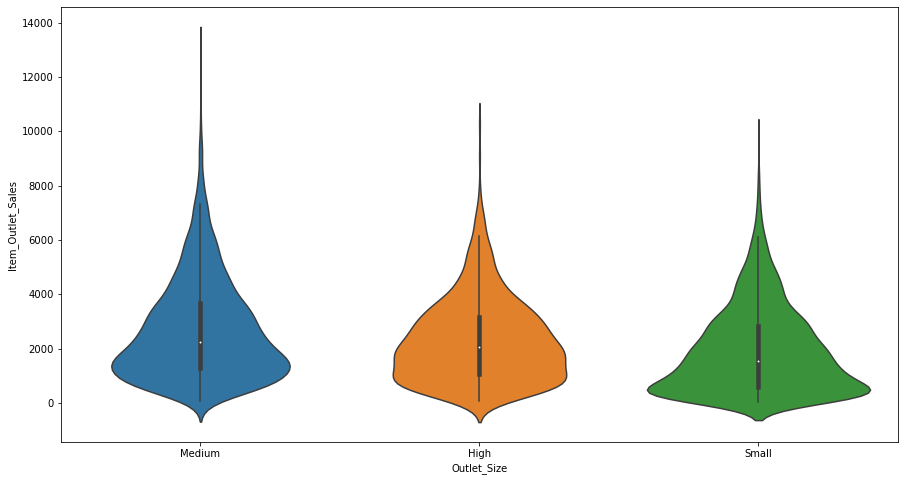

In [83]:
# Check the Violinplot of Outlet Size and Sales

sns.violinplot(x = "Outlet_Size", y = "Item_Outlet_Sales", data = combined)

In [85]:
# Filling Small where the Outlet 10 and Outlet 19 appear to have same data distribution...
combined.loc[combined.Outlet_Size.isnull(), "Outlet_Identifier"].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [88]:
# Small in Out010
combined.loc[combined.Outlet_Identifier=="OUT010", "Outlet_Size"]="Small"

In [89]:
# Check the Numerical Analysis...
combined.groupby("Outlet_Identifier")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Identifier,,,,,,,,
OUT010,555.0,339.351662,271.014855,33.2900,154.13270,250.3408,455.40720,1775.6886
OUT013,932.0,2298.995256,1533.531664,73.2380,1072.60380,2050.6640,3166.37835,10256.6490
OUT017,926.0,2340.675263,1550.778025,143.8128,1195.94325,2005.0567,3096.46935,9664.7528
OUT018,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228
OUT019,528.0,340.329723,249.979449,33.9558,153.63335,265.3213,460.73360,1482.0708
OUT027,935.0,3694.038558,2127.760054,241.6854,2044.33890,3364.9532,4975.52340,13086.9648
OUT035,930.0,2438.841866,1538.512533,113.8518,1238.88735,2109.2544,3310.35760,8479.6288
OUT045,929.0,2192.384798,1462.399658,99.8700,1068.60900,1834.9448,2929.52000,8994.9580
OUT046,930.0,2277.844267,1488.405631,101.8674,1137.18640,1945.8005,3095.63710,9779.9362


In [90]:
# Desc Stats of Sales basis outlet type
combined.groupby("Outlet_Size")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Size,,,,,,,,
High,932.0,2298.995256,1533.531664,73.2380,1072.6038,2050.6640,3166.37835,10256.6490
Medium,2793.0,2681.603542,1855.210528,69.2432,1270.3464,2251.0698,3691.19520,13086.9648
Small,2943.0,1615.546167,1556.928329,33.2900,362.5281,1090.5804,2463.46000,9779.9362


In [92]:
# Outlet Location Type & Outlet Type ~Outlet Size


combined.loc[combined.Outlet_Size.isnull(), ["Outlet_Type", "Outlet_Location_Type"]].value_counts()

Outlet_Type        Outlet_Location_Type
Supermarket Type1  Tier 2                  3091
dtype: int64

In [97]:
# S1 and Tier2

combined.loc[(combined.Outlet_Type=="Supermarket Type1") & 
             (combined.Outlet_Location_Type=="Tier 2"), "Outlet_Size"].unique()

array([nan, 'Small'], dtype=object)

In [98]:
# Outlet ID ~Grocery or something else...
combined.loc[combined.Outlet_Identifier=="OUT017", "Outlet_Type"].value_counts()

Supermarket Type1    1543
Name: Outlet_Type, dtype: int64

In [99]:
combined.loc[combined.Outlet_Type=="Supermarket Type1", "Outlet_Size"].value_counts()

Small     3100
High      1553
Medium    1550
Name: Outlet_Size, dtype: int64

In [100]:
combined.groupby(["Outlet_Location_Type", "Outlet_Type"])["Outlet_Size"].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small           880
                      Supermarket Type1  Medium         1550
                                         Small          1550
Tier 2                Supermarket Type1  Small          1550
Tier 3                Grocery Store      Small           925
                      Supermarket Type1  High           1553
                      Supermarket Type2  Medium         1546
                      Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

In [101]:
# Outlet 45 ~ High

combined.loc[combined.Outlet_Identifier=="OUT045", "Outlet_Size"] = "High"

In [102]:
# Imputting Small in Outlet 17

combined.loc[combined.Outlet_Identifier=="OUT017", "Outlet_Size"] = "Small"

In [103]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

### Feature Engineering

In [116]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Ids
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Non Edible,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [108]:
ids = []

for i in combined.Item_Identifier:
    ids.append(i[:2])

In [111]:
combined["Item_Ids"] = pd.Series(ids)

In [115]:
# Non Edible
combined.loc[combined.Item_Ids=="NC", "Item_Fat_Content"]="Non Edible"

In [119]:
# Item Type
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [121]:
# Bin this Data....Perishable and Non Perishable...

perishables = ['Dairy', 'Meat', 'Fruits and Vegetables',
       'Breakfast', 'Breads', 'Seafood']

In [122]:
def perish(x):
    if x in perishables:
        return("Perishable")
    else:
        return("Non_Perishable")

In [124]:
combined["ItemType_Cat"]= combined.Item_Type.apply(perish)

In [141]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Ids,ItemType_Cat,Outlet_Freq,Outlet_Vintage,Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,0.109124,14,2323.225560
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perishable,0.108843,4,285.753664
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable,0.109124,14,2478.315000
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,Perishable,0.065123,15,3496.224000
4,NCD19,8.93,Non Edible,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non_Perishable,0.109335,26,480.982302


In [130]:
# Outlet ID - Frequency Encoding
freq = combined.Outlet_Identifier.value_counts()/14204

combined["Outlet_Freq"] = combined.Outlet_Identifier.map(freq)

In [134]:
# Vintage
combined["Outlet_Vintage"] = 2013 - combined.Outlet_Establishment_Year

In [137]:
# Creating the Sales Columns...weight*mrp

combined["Sales"]= combined.Item_Weight*combined.Item_MRP

In [139]:
combined.loc[:, ["Sales", "Item_Outlet_Sales"]].corr()

,Sales,Item_Outlet_Sales
Sales,1.000000,0.428967
Item_Outlet_Sales,0.428967,1.000000


<IPython.core.display.Javascript object>

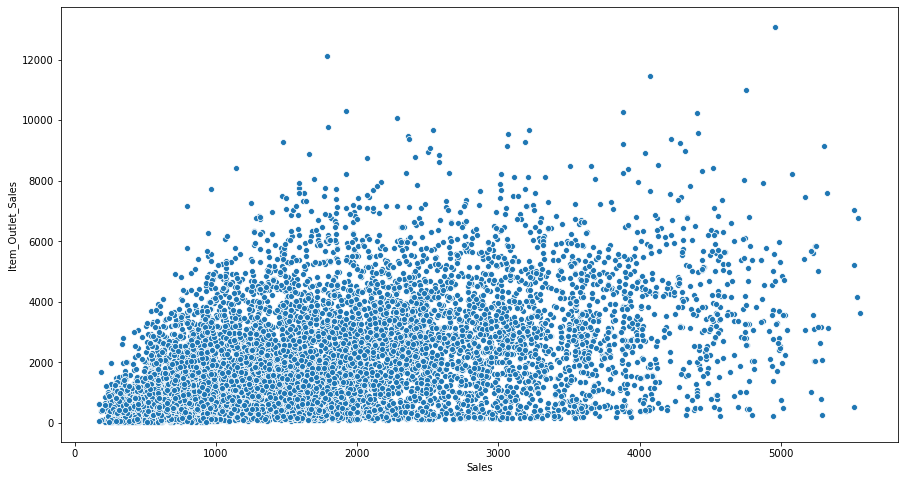

In [140]:
sns.scatterplot(x = "Sales", y = "Item_Outlet_Sales", data = combined)

In [142]:
# Drop the Variables

final = combined.drop(["Item_Identifier",
                       "Item_Type", "Outlet_Identifier", 
                       "Outlet_Establishment_Year"], axis = 1)

final.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Ids,ItemType_Cat,Outlet_Freq,Outlet_Vintage,Sales
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,0.109124,14,2323.225560
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perishable,0.108843,4,285.753664
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable,0.109124,14,2478.315000
3,19.20,Regular,0.022914,182.0950,Small,Tier 3,Grocery Store,732.3800,FD,Perishable,0.065123,15,3496.224000
4,8.93,Non Edible,0.013177,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,Non_Perishable,0.109335,26,480.982302


### Statistical Tests

In [144]:
# New Sales created has some impact on TGT
#H0: That the new sales column created has not effect on Target
#Ha: that it has effect on TGT

stats.ttest_ind(final.Sales.dropna(), final.Item_Outlet_Sales.dropna())

# new sales column created is significant...

Ttest_indResult(statistic=-19.797586688402117, pvalue=1.674578064515016e-86)

In [145]:
# If Vintage is Significant
stats.ttest_ind(final.Outlet_Vintage.dropna(), final.Item_Outlet_Sales.dropna())

Ttest_indResult(statistic=-151.27920299384095, pvalue=0.0)

In [146]:
# If Outlet_Freq is Significant
stats.ttest_ind(final.Outlet_Freq.dropna(), final.Item_Outlet_Sales.dropna())

Ttest_indResult(statistic=-152.33444860527277, pvalue=0.0)

In [150]:
# Encoding the Data in Dummies...

final["Outlet_Size"] = final.Outlet_Size.map({"Small":1, "Medium":2, "High":3})

In [155]:
dummydata = pd.get_dummies(final, drop_first = True)

In [160]:
# Split the Data in Train and Test

newtrain = dummydata.loc[0:train.shape[0]-1, ]
newtest = dummydata.loc[train.shape[0]:, ]

In [163]:
newtrain.shape, newtest.shape

((8523, 18), (5681, 17))

In [162]:
# Drop the Tgt from Sales
newtest = newtest.drop("Item_Outlet_Sales", axis = 1)

### Model Building

* Linear Regression
* Decision Tree
* Random Forest
* Adaboost
* Gradient Boosting

In [164]:
newtrain.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Outlet_Freq,Outlet_Vintage,Sales,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Ids_FD,Item_Ids_NC,ItemType_Cat_Perishable
0,9.30,0.016047,249.8092,2,3735.1380,0.109124,14,2323.225560,0,0,0,0,1,0,0,1,0,1
1,5.92,0.019278,48.2692,2,443.4228,0.108843,4,285.753664,0,1,0,1,0,1,0,0,0,0
2,17.50,0.016760,141.6180,2,2097.2700,0.109124,14,2478.315000,0,0,0,0,1,0,0,1,0,1
3,19.20,0.022914,182.0950,1,732.3800,0.065123,15,3496.224000,0,1,0,1,0,0,0,1,0,1
4,8.93,0.013177,53.8614,3,994.7052,0.109335,26,480.982302,1,0,0,1,1,0,0,0,1,0


In [169]:
newtest.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Freq,Outlet_Vintage,Sales,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Ids_FD,Item_Ids_NC,ItemType_Cat_Perishable
8523,20.75,0.007565,107.8622,2,0.109124,14,2238.14065,0,0,0,0,1,0,0,1,0,0
8524,8.30,0.038428,87.3198,1,0.108631,6,724.75434,0,1,1,0,1,0,0,1,0,1
8525,14.60,0.099575,241.7538,1,0.065123,15,3529.60548,1,0,0,1,0,0,0,0,1,0
8526,7.32,0.015388,155.0340,1,0.108631,6,1134.84888,0,0,1,0,1,0,0,1,0,0
8527,13.60,0.118599,234.2300,2,0.109758,28,3185.52800,0,1,0,1,0,0,1,1,0,1


In [166]:
X = newtrain.drop("Item_Outlet_Sales", axis = 1)
y = newtrain.Item_Outlet_Sales

In [167]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

pred_lr = lr.fit(X, y).predict(newtest)

In [170]:
# Regression Problem - Average and Classification - 0

solution = pd.DataFrame({"Item_Identifier": test.Item_Identifier, 
                        "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales": np.abs(pred_lr)})

solution.to_csv("LRMODEL.csv", index = False) # 1170

In [171]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()

pred_dtree = dtree.fit(X, y).predict(newtest)

# Regression Problem - Average and Classification - 0

solution = pd.DataFrame({"Item_Identifier": test.Item_Identifier, 
                        "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales": np.abs(pred_dtree)})

solution.to_csv("Tree_model.csv", index = False) # 1564

In [172]:
# Random Forest Model

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
rf = RandomForestRegressor()
ada = AdaBoostRegressor()
gbm = GradientBoostingRegressor()

pred_rf = rf.fit(X, y).predict(newtest)
pred_ada = ada.fit(X, y).predict(newtest)
pred_gbm = gbm.fit(X, y).predict(newtest)


# Regression Problem - Average and Classification - 0

solution = pd.DataFrame({"Item_Identifier": test.Item_Identifier, 
                        "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales": np.abs(pred_rf)})

solution.to_csv("RFModel.csv", index = False) # 1208.2005261791987.

In [173]:
solution = pd.DataFrame({"Item_Identifier": test.Item_Identifier, 
                        "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales": np.abs(pred_ada)})

solution.to_csv("ADABOOST.csv", index = False) # 1336.5848225560062.

In [174]:
solution = pd.DataFrame({"Item_Identifier": test.Item_Identifier, 
                        "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales": np.abs(pred_gbm)})

solution.to_csv("GBM.csv", index = False) # 1153.9670730231126.

In [175]:
#XGBOOST MODEL

from xgboost import XGBRegressor
xgb = XGBRegressor()

pred_XGB = xgb.fit(X, y).predict(newtest)


# Regression Problem - Average and Classification - 0

solution = pd.DataFrame({"Item_Identifier": test.Item_Identifier, 
                        "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales": np.abs(pred_XGB)})

solution.to_csv("XGB.csv", index = False) # 1222

In [177]:
# Light GBM
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()

pred_lgbm = lgbm.fit(X, y).predict(newtest)


# Regression Problem - Average and Classification - 0

solution = pd.DataFrame({"Item_Identifier": test.Item_Identifier, 
                        "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales": np.abs(pred_lgbm)})

solution.to_csv("LGBM.csv", index = False) # 1175

### Final Model on GBM

1. Cross Validated Model
2. Hyper Parameter Tuned Model...

In [210]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle = True)

lgbm = LGBMRegressor()
pred_gbm = pd.DataFrame()

n = 50
for i in range(n):
    folds = next(kfold.split(X)) # Split the Data in even groups
    xtrain = X.iloc[folds[0]]
    ytrain = y.iloc[folds[0]]
    #print(xtrain.shape, ytrain.shape)
    pred_gbm[i] = lgbm.fit(xtrain, ytrain).predict(newtest)

In [211]:
gbm_cv = pred_gbm.mean(axis = 1)

In [212]:
solution = pd.DataFrame({"Item_Identifier": test.Item_Identifier, 
                        "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales": np.abs(gbm_cv)})

solution.to_csv("LGBM_50CV.csv", index = False) # 1151.6903318139748 | LGBM 1163.

In [198]:
# Tune the Parameters of the GBM

from sklearn.model_selection import GridSearchCV

gbm = GradientBoostingRegressor()

params = [{"loss":['squared_error', 'absolute_error', 'huber', 'quantile'],
         "learning_rate":[0.1, 0.2, 0.01, 0.25, 0.3, 0.5],
          "criterion":['friedman_mse', 'squared_error', 'mse'],
          'max_depth':[4, 5,6,7,8]}]

In [204]:
params = [{#"loss":['squared_error', 'absolute_error', 'huber', 'quantile']
         #"learning_rate":[0.1, 0.2, 0.01, 0.25, 0.3, 0.5]}]
          #"criterion":['friedman_mse', 'squared_error', 'mse']
          'max_depth':[4, 5,6,7,8]}]
search = GridSearchCV(estimator=gbm, param_grid=params, cv = 10)

search.fit(X, y)

print(search.best_params_)

{'max_depth': 4}


In [205]:
# Tuned Model

kfold = KFold(n_splits=10, shuffle = True)

tunedgbm = GradientBoostingRegressor(loss = 'huber', learning_rate =0.1 , 
                                     criterion = "mse", max_depth = 4)

#lgbm = LGBMRegressor()
pred_gbm = pd.DataFrame()

n = 25
for i in range(n):
    folds = next(kfold.split(X)) # Split the Data in even groups
    xtrain = X.iloc[folds[0]]
    ytrain = y.iloc[folds[0]]
    #print(xtrain.shape, ytrain.shape)
    pred_gbm[i] = tunedgbm.fit(xtrain, ytrain).predict(newtest)

In [206]:
gbm_cv = pred_gbm.mean(axis = 1)

solution = pd.DataFrame({"Item_Identifier": test.Item_Identifier, 
                        "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales": np.abs(gbm_cv)})

solution.to_csv("TunedGBMModel.csv", index = False) # 1158.3901242489567.

In [207]:
tunedgbm = GradientBoostingRegressor(loss = 'huber', learning_rate =0.1 , 
                                     criterion = "mse", max_depth = 4)

pred_tuned = tunedgbm.fit(X, y).predict(newtest)


# Regression Problem - Average and Classification - 0

solution = pd.DataFrame({"Item_Identifier": test.Item_Identifier, 
                        "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales": np.abs(pred_tuned)})

solution.to_csv("Tuned.csv", index = False) # 1161

In [208]:
# Catboost
from catboost import CatBoostRegressor
cbr =CatBoostRegressor()

pred_cbr = cbr.fit(X, y).predict(newtest)


# Regression Problem - Average and Classification - 0

solution = pd.DataFrame({"Item_Identifier": test.Item_Identifier, 
                        "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales": np.abs(pred_cbr)})

solution.to_csv("CBR.csv", index = False) # 1175

Learning rate set to 0.057154
0:	learn: 1654.2761238	total: 67.4ms	remaining: 1m 7s
1:	learn: 1606.2111668	total: 70.2ms	remaining: 35s
2:	learn: 1559.2712787	total: 73ms	remaining: 24.2s
3:	learn: 1516.1724341	total: 75.7ms	remaining: 18.8s
4:	learn: 1475.6795318	total: 78.4ms	remaining: 15.6s
5:	learn: 1440.8360892	total: 81.1ms	remaining: 13.4s
6:	learn: 1408.2806733	total: 84ms	remaining: 11.9s
7:	learn: 1377.8862874	total: 86.8ms	remaining: 10.8s
8:	learn: 1350.7350360	total: 89ms	remaining: 9.8s
9:	learn: 1324.7663877	total: 91.5ms	remaining: 9.06s
10:	learn: 1301.5208700	total: 94.2ms	remaining: 8.47s
11:	learn: 1279.7810007	total: 96.8ms	remaining: 7.97s
12:	learn: 1260.8062072	total: 99.4ms	remaining: 7.55s
13:	learn: 1242.7651343	total: 102ms	remaining: 7.19s
14:	learn: 1226.1253216	total: 105ms	remaining: 6.89s
15:	learn: 1211.3033625	total: 107ms	remaining: 6.61s
16:	learn: 1198.2334471	total: 110ms	remaining: 6.37s
17:	learn: 1187.0424466	total: 113ms	remaining: 6.15s
18:	

164:	learn: 1026.0730474	total: 511ms	remaining: 2.58s
165:	learn: 1025.6129126	total: 513ms	remaining: 2.58s
166:	learn: 1025.3308163	total: 516ms	remaining: 2.57s
167:	learn: 1024.9211479	total: 519ms	remaining: 2.57s
168:	learn: 1024.5425315	total: 522ms	remaining: 2.56s
169:	learn: 1024.0630395	total: 524ms	remaining: 2.56s
170:	learn: 1023.5489283	total: 527ms	remaining: 2.56s
171:	learn: 1023.2154786	total: 530ms	remaining: 2.55s
172:	learn: 1022.8756561	total: 533ms	remaining: 2.55s
173:	learn: 1022.3830551	total: 536ms	remaining: 2.55s
174:	learn: 1022.0810316	total: 539ms	remaining: 2.54s
175:	learn: 1021.7913061	total: 542ms	remaining: 2.54s
176:	learn: 1021.3837935	total: 545ms	remaining: 2.53s
177:	learn: 1021.0144048	total: 548ms	remaining: 2.53s
178:	learn: 1020.7123323	total: 550ms	remaining: 2.52s
179:	learn: 1020.4780501	total: 553ms	remaining: 2.52s
180:	learn: 1020.0236902	total: 556ms	remaining: 2.52s
181:	learn: 1019.6482307	total: 558ms	remaining: 2.51s
182:	learn

358:	learn: 968.7854750	total: 1.04s	remaining: 1.86s
359:	learn: 968.4087935	total: 1.05s	remaining: 1.86s
360:	learn: 968.1608935	total: 1.05s	remaining: 1.86s
361:	learn: 967.8928198	total: 1.05s	remaining: 1.85s
362:	learn: 967.6053583	total: 1.05s	remaining: 1.85s
363:	learn: 967.4138876	total: 1.06s	remaining: 1.85s
364:	learn: 967.3145858	total: 1.06s	remaining: 1.84s
365:	learn: 966.9048028	total: 1.06s	remaining: 1.84s
366:	learn: 966.7524549	total: 1.07s	remaining: 1.84s
367:	learn: 966.4139865	total: 1.07s	remaining: 1.83s
368:	learn: 966.0749524	total: 1.07s	remaining: 1.83s
369:	learn: 965.7142504	total: 1.07s	remaining: 1.83s
370:	learn: 965.3464094	total: 1.08s	remaining: 1.83s
371:	learn: 965.0440724	total: 1.08s	remaining: 1.82s
372:	learn: 964.8925809	total: 1.08s	remaining: 1.82s
373:	learn: 964.7282301	total: 1.09s	remaining: 1.82s
374:	learn: 964.5809784	total: 1.09s	remaining: 1.81s
375:	learn: 964.4128216	total: 1.09s	remaining: 1.81s
376:	learn: 964.0931367	tota

549:	learn: 927.1625188	total: 1.58s	remaining: 1.29s
550:	learn: 927.0587867	total: 1.58s	remaining: 1.29s
551:	learn: 926.9187546	total: 1.58s	remaining: 1.28s
552:	learn: 926.6704386	total: 1.59s	remaining: 1.28s
553:	learn: 926.4458607	total: 1.59s	remaining: 1.28s
554:	learn: 926.2005169	total: 1.59s	remaining: 1.28s
555:	learn: 926.0638861	total: 1.59s	remaining: 1.27s
556:	learn: 925.8861133	total: 1.6s	remaining: 1.27s
557:	learn: 925.7348249	total: 1.6s	remaining: 1.27s
558:	learn: 925.6609148	total: 1.6s	remaining: 1.26s
559:	learn: 925.4545666	total: 1.6s	remaining: 1.26s
560:	learn: 925.2426930	total: 1.61s	remaining: 1.26s
561:	learn: 924.9992936	total: 1.61s	remaining: 1.25s
562:	learn: 924.8578056	total: 1.61s	remaining: 1.25s
563:	learn: 924.6407178	total: 1.62s	remaining: 1.25s
564:	learn: 924.4185400	total: 1.62s	remaining: 1.25s
565:	learn: 924.0365760	total: 1.62s	remaining: 1.24s
566:	learn: 923.8345740	total: 1.62s	remaining: 1.24s
567:	learn: 923.6623345	total: 1

741:	learn: 891.9722913	total: 2.11s	remaining: 734ms
742:	learn: 891.8135946	total: 2.11s	remaining: 731ms
743:	learn: 891.6885431	total: 2.12s	remaining: 729ms
744:	learn: 891.4461239	total: 2.12s	remaining: 726ms
745:	learn: 891.2877808	total: 2.12s	remaining: 723ms
746:	learn: 891.1769592	total: 2.13s	remaining: 720ms
747:	learn: 890.9407074	total: 2.13s	remaining: 717ms
748:	learn: 890.8546819	total: 2.13s	remaining: 714ms
749:	learn: 890.7878933	total: 2.13s	remaining: 712ms
750:	learn: 890.6287675	total: 2.14s	remaining: 709ms
751:	learn: 890.5220503	total: 2.14s	remaining: 706ms
752:	learn: 890.4035292	total: 2.14s	remaining: 703ms
753:	learn: 890.2640051	total: 2.15s	remaining: 700ms
754:	learn: 890.1611565	total: 2.15s	remaining: 697ms
755:	learn: 889.9604392	total: 2.15s	remaining: 694ms
756:	learn: 889.8302299	total: 2.15s	remaining: 691ms
757:	learn: 889.5925975	total: 2.16s	remaining: 688ms
758:	learn: 889.4907821	total: 2.16s	remaining: 686ms
759:	learn: 889.3301346	tota

936:	learn: 862.9335620	total: 2.64s	remaining: 178ms
937:	learn: 862.7727865	total: 2.65s	remaining: 175ms
938:	learn: 862.6392387	total: 2.65s	remaining: 172ms
939:	learn: 862.4988577	total: 2.65s	remaining: 169ms
940:	learn: 862.3627213	total: 2.65s	remaining: 167ms
941:	learn: 862.0117445	total: 2.66s	remaining: 164ms
942:	learn: 861.9414572	total: 2.66s	remaining: 161ms
943:	learn: 861.8262027	total: 2.66s	remaining: 158ms
944:	learn: 861.5777006	total: 2.67s	remaining: 155ms
945:	learn: 861.4487938	total: 2.67s	remaining: 152ms
946:	learn: 861.3430688	total: 2.67s	remaining: 150ms
947:	learn: 861.2383660	total: 2.67s	remaining: 147ms
948:	learn: 861.1345721	total: 2.68s	remaining: 144ms
949:	learn: 860.9977976	total: 2.68s	remaining: 141ms
950:	learn: 860.7716448	total: 2.68s	remaining: 138ms
951:	learn: 860.5729874	total: 2.69s	remaining: 135ms
952:	learn: 860.5103130	total: 2.69s	remaining: 133ms
953:	learn: 860.4349970	total: 2.69s	remaining: 130ms
954:	learn: 860.2209554	tota

### Summary of Model

**GBM with KFold CV appears to be the Best Model giving 1151 RMSE.**